# Create environment for running AI program

> __Install libraris__ https://pypi.org

In [3]:
# %pip install pandas
# %pip install heartpy
# %pip install tsfel
# %pip install librosa
# %pip install statsmodels
# %pip install lightgbm
# %pip install catboost
# %pip install xgboost

> __Import libraries and dependencies__

In [4]:
import pandas as pd
import numpy as np
import heartpy as hp
from matplotlib import pyplot as plt
import tsfel
import scipy 
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
import librosa
import csv
import pandas as pd
import os
import xgboost as xgb
import random
import statsmodels.regression
from warnings import filterwarnings
import lightgbm as ltb
from sklearn import metrics
import catboost as cb
from sklearn.model_selection import GridSearchCV
import time
from datetime import datetime
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from IPython.display import clear_output

# __Data collection & preprocessing__

> Mount Gdrive

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive')

> Data sorting and selection

In [6]:
#data directory
# fdvp = 'gdrive/My Drive/Colab Notebooks/SCI#02/DataBase/data/'
fdvp = './DataBase/data/'

# 37 was selected at first
falias = [   
            '3n/0326__0.csv',
            '3n/0402__0.csv',
            '3n/0402__1.csv',
            '3n/0402__2.csv',
            '3n/0402_._2.csv',
            '3n/0402_._3.csv',
            '3n/0402_._4.csv',
            '3n/0402_._5.csv',
            '3n/0402_._6.csv',
            '3n/0402_._7.csv',
            '3n/0402_._8.csv',
            '3n/0402_._9.csv',
            '3n/0402_._10.csv',
            '3n/0402_._11.csv',
            '3n/0412_0.csv',
            '3n/0412_1.csv',
            '3n/0412_2.csv',
            '3n/0412_3.csv',
            '3n/0412_4.csv',
            '3n/0412_5.csv',
            '3n/0412_6.csv',
            '3n/0412_7.csv',
            '3n/0412_8.csv',
            '3n2/0421_0.csv',
            '3n2/0421_1.csv',
            '3n2/0421_2.csv',
            '3n2/0421_3.csv',
            '3n2/0421_4.csv',
            '3n2/0421_5.csv',
            '3n2/0422_0.csv',
            '3n2/0422_1.csv',
            '3n2/0422_2.csv',
            '3n2/0422_3.csv',
            '3n2/0422_4.csv',
            '3n2/0422_5.csv',
            '3n2/0422_6.csv',
            '3n2/0422_7.csv'
        ]
datLab  = [8,6.4,6.7,8.9,5.4,7.6,6.6,7.2,6.2,9.1,7.8,6.4,5.7,6.2,8.1,7.5,6.6,6.8,7.2,8.1,7.2,6.1,6.2,6.5,6.4,5.6,8,6.6,7.5,6.5,5.2,7.4,5.9,7.7,9.8,7.7,6.8]
datspo2 = [97,97,97,99,94,95,96,94,95,97,97,95,97,96,98,97,97,97,97,97,97,97,98,99,96,96,97,97,94,95,97,96,96,96,98,98,96]
age     = [61,63,51,68,74,63,78,51,64,67,60,65,74,61,86,72,86,52,43,66,54,53,61,70,50,46,63,56,64,60,55,68,74,66,60,51,60]
gen     = ['M','F','F','M','M','M','F','M','F','M','M','F','M','M','F','F','F','M','M','F','M','F','M','M','F','M','F','F','M','M','F','F','F','F','M','M','F']
fw      = [2,1.3,1.2,1.3,1.3,1.4,1.2,1.5,1.3,1.5,1.1,1.3,1.3,1.2,1.1,1.2,1.1,1.5,1.5,1.2,1.5,1.3,1.6,1.2,1.1,1.5,1.1,1.4,1.3,1.4,1.3,1.2,1.4,1.3,1.3,1.5,1.2]
bmi     = [27.3,22.2,23.4,25.4,25.4,25.4,20,31.1,33.2,24.7,25.7,31.1,25.4,24.2,22.22222222,27.34375,19.53125,27.6816609,25.390625,22.22222222,23.87511478,20.81165453,25.71166208,27.6816609,20.81165453,24.48979592,20.81165453,20.81165453,25.390625,25.71166208,22.89281998,31.11111111,26.66666667,25.390625,20.76124567,22.09317005,21.484375]

# 4 data inserted
falias  = falias  + ['3n2/Lab0524_0.csv','3n2/Lab0524_1.csv','3n2/Lab0524_2.csv','3n2/Lab0524_3.csv']
datLab  = datLab  + [6.2,5.9,5.4,5.7]
datspo2 = datspo2 + [97,97,95,97]
age     = age     + [26,28,27,35]
gen     = gen     + ['M','M','F','M']
fw      = fw      + [1.4,1.3,1.2,1.3]
bmi     = bmi     + [35.25569181,30.69387755,26.56434475,26.42356982]

# New data

falias  = falias  + ['m/0.csv','m/1.csv' ,'m/2.csv', 'm/3.csv' ,'m/4.csv','m/5.csv', 'm/6.csv' ,'m/7.csv' ,'m/8.csv' ,'m/9.csv','m/10.csv' ,'m/11.csv' ,'m/12.csv' ,'m/13.csv' ,'m/14.csv','m/15.csv' ,'m/16.csv' ,'m/17.csv' ,'m/18.csv' ,'m/19.csv']
datLab  = datLab  + [4.9, 5.7 ,5.9, 5.2, 6.2, 5.9, 5.7, 5.8, 8.8 ,8.2 ,5.9 ,5.4 ,5.8 ,9.1 ,5.9 ,6.4 ,6.1 ,6.1,5.5,5.9]
datspo2 = datspo2 + [97 ,96, 96, 99, 97, 97 ,95, 97, 95 ,96 ,97, 98, 95, 98, 97, 96, 98 ,97, 93 ,97]
age     = age     + [26, 27, 25, 28, 31, 27, 27, 25, 55, 55, 32, 26, 31, 55, 27, 26, 27, 27, 26, 29]
gen     = gen     + ['F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'M' ,'M','F', 'M']
fw      = fw      + [1.1,1.3 ,1.4, 1.4 ,1.3 ,1.4, 1.3, 1.3, 1.5, 1.5, 1.1, 1.2, 1.3, 1.5 ,1.3 ,1.1, 1.2, 1.3,1.1, 1.3]
bmi     = bmi     + [28.8,31.9, 33.1, 27.0,  25.3, 32.2, 31.9, 21.6, 33.1 ,33.1, 25.9 ,27.6, 27.8, 33.1,31.9, 23.5, 24.4, 28.1, 24.0, 32.9]


# Delete as per below array index
dlst    = [0,1,2,3,4,5,8,9,12,13,14,16,19,25,26,29,30,32,34,39,40]
#dlst    = [0,1,2,3,4,5,8,9,12,13,14,16,19,25,26,29,30,32,34,40,42]
dlst.sort(reverse=True)
for i in dlst:
    del falias[i]
    del datLab[i]
    del datspo2[i]
    del age[i]
    del gen[i]
    del fw[i]
    del bmi[i]


# falias  = falias[:-35]
# datLab  = datLab[:-35] 
# datspo2 = datspo2[:-35]
# age     = age[:-35]
# gen     = gen[:-35] 
# fw      = fw[:-35] 
# bmi     = bmi[:-35] 



# Number of data
fnam = []
for e in falias:
    fnam.append(fdvp+e)
print(len(fnam))


# Notes
#fnam = filenames
#datLab = Ref HbA1c data
#datspo2 = Ref SpO2 data
#age = reference age data
#gen = subjects' gender data
#fw = subjects' finger width data
#bmi = subjects' bmi data

40


> Creating Pandas Dataframe

In [7]:
## Making Padas Dataframe
df = pd.DataFrame()
df['hba1c'] = pd.DataFrame(datLab)
df['spo2']  = pd.DataFrame(datspo2)
df['age']   = pd.DataFrame(age)
df['gen']   = pd.DataFrame(gen)
df['fw']    = pd.DataFrame(fw)
df['bmi']   = pd.DataFrame(bmi)

## Check dataframe
# df

> Creating Individual Arrary Datasets

In [8]:
## Making Array
hba1c = np.asarray(datLab)
spo2  = np.asarray(datspo2)
age   = np.asarray(age)
gen   = np.asarray(gen)
fw    = np.asarray(fw)
bmi   = np.asarray(bmi)

## Check datasets
print(hba1c,spo2,age,gen,fw,bmi)

[6.6 7.2 7.8 6.4 7.5 6.8 7.2 7.2 6.1 6.2 6.5 6.4 6.6 7.5 7.4 7.7 7.7 6.8
 6.2 5.9 4.9 5.7 5.9 5.2 6.2 5.9 5.7 5.8 8.8 8.2 5.9 5.4 5.8 9.1 5.9 6.4
 6.1 6.1 5.5 5.9] [96 94 97 95 97 97 97 97 97 98 99 96 97 94 96 96 98 96 97 97 97 96 96 99
 97 97 95 97 95 96 97 98 95 98 97 96 98 97 93 97] [78 51 60 65 72 52 43 54 53 61 70 50 56 64 68 66 51 60 26 28 26 27 25 28
 31 27 27 25 55 55 32 26 31 55 27 26 27 27 26 29] ['F' 'M' 'M' 'F' 'F' 'M' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'F'
 'M' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'F'
 'M' 'M' 'F' 'M'] [1.2 1.5 1.1 1.3 1.2 1.5 1.5 1.5 1.3 1.6 1.2 1.1 1.4 1.3 1.2 1.3 1.5 1.2
 1.4 1.3 1.1 1.3 1.4 1.4 1.3 1.4 1.3 1.3 1.5 1.5 1.1 1.2 1.3 1.5 1.3 1.1
 1.2 1.3 1.1 1.3] [20.         31.1        25.7        31.1        27.34375    27.6816609
 25.390625   23.87511478 20.81165453 25.71166208 27.6816609  20.81165453
 20.81165453 25.390625   31.11111111 25.390625   22.09317005 21.484375
 35.25569181 30.69387755 28.8        31.9     

# __Predifined Parameters__

In [9]:
n_features = 22
percent    = 0.02
sr         = 37

# __User Defined Functions__

> Function 01: baseline_drift_remove

In [10]:
def baseline_drift_remove(sig):
    # new_signal = np.empty((1, 200))
    new_signal = np.empty((150000, 200))
    window_size = 100
    # y=np.zeros((1))
    # x=np.zeros((1))
    y=np.zeros((150000))
    x=np.zeros((150000))
    
    sig_frame = librosa.util.frame(np.asarray(sig), frame_length=window_size, hop_length=window_size, axis = 0)
    
    for i in range(0, sig_frame.shape[0]):
        # y = np.append(y, np.min(sig_frame[i,:]))
        y[i] = np.min(sig_frame[i,:])
        index = np.argmin(sig_frame[i,:])
        # x = np.append(x, i * window_size + index)
        x[i] = i * window_size + index
    # y = np.delete(y,0,0)
    # x = np.delete(x,0,0)
    y = y[0:i]
    x = x[0:i]
    # print('bdr')

    baseline_x = np.arange(0, sig.shape[0])
    tck = scipy.interpolate.splrep(x, y, s=0, k=1)
    baseline_y = scipy.interpolate.splev(baseline_x, tck)
    sig = sig - baseline_y
    
    for i in range(0, x.shape[0]):
        if (i == x.shape[0]-1):
            break
        sig_rs = sig[int(x[i]):int(x[i]+200)].reshape(-1,1).T
        try:
            # new_signal = np.append(new_signal, sig_rs, axis = 0)
            new_signal[i] = sig_rs
        except:
            continue
    # new_signal = np.delete(new_signal,0,0)
    new_signal = new_signal[0:i]
    return new_signal

> Function 02: butter_lowpass_filter

In [11]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y

> Function 03: Kaiser Teaser Energy

In [12]:
def KTE(x):
    x = np.array(x)
    l = len(x)
    squ = x[1:l-1]**2
    oddi = x[0:l-2]
    eveni = x[2:l]
    ex = squ - (oddi*eveni)
    kte = np.zeros([l,])
    kte[0] = ex[0]
    kte[-1] = ex[-1]
    kte[1:-1] = ex
    return kte

> __Function 4.1:__ BA_Plot

In [13]:
def bland_altman_plot(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff,   c = 'black')
    plt.axhline(md,           color='green', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red',   linestyle='--')
    plt.axhline(md - 1.96*sd, color='red',   linestyle='--')
    plt.xlabel("Average of the two measures", fontsize = 14)
    plt.ylabel("Difference between the two measures", fontsize = 14)
    plt.title("Bland-Altman plot for estimated %HbA1c values", fontsize = 14)
    # plt.savefig('./Figure/RF_trans_BA_Plot.png', bbox_inches = "tight", transparent = True, dpi = 400)

> __Function 4.2:__ EGA_Plot

In [14]:
from matplotlib.patches import Circle, Wedge, Polygon, Path
from matplotlib.collections import PatchCollection

def error_grid_analysis(ref,est):
    fig, ax = plt.subplots()

    polygons = []

    A  = [[4.0,4.0],[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,12.0],[6.5,12.0],[6.5,7.2],[5.4,5.7],[4.0,5.7]]
    Bd = [[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,5.7],[6.5,5.7],[6.5,4.0]]
    Bu = [[4.0,5.7],[5.4,5.7],[6.5,7.2],[6.5,12.0],[5.7,12.0],[5.7,6.5],[4.0,6.5]]
    Cd = [[6.5,4.0],[6.5,5.7],[12.0,5.7],[12.0,4.0]]
    Cu = [[4.0,6.5],[5.7,6.5],[5.7,12.0],[4.0,12.0]]

    # print(np.asarray(A).shape)
    pA  = Polygon(np.asarray(A))
    pBd = Polygon(np.asarray(Bd))
    pBu = Polygon(np.asarray(Bu))
    pCd = Polygon(np.asarray(Cd))
    pCu = Polygon(np.asarray(Cu))

    polygons.append(pA)
    polygons.append(pBd)
    polygons.append(pBu)
    polygons.append(pCd)
    polygons.append(pCu)


    p = PatchCollection(polygons)
    p.set_color([[0,1,0,0.3],[1,1,0,0.3],[1,1,0,0.3],[1,0,0,0.3],[1,0,0,0.3]])
    ax.add_collection(p)



    plt.plot([4.0,12.0],[4.0,12.0])


    x = ref
    y = est

    sA = []
    sB = []
    sC = []
    for i in range(len(y)):
        sA.append(int(pA.contains_point ([x[i],y[i]]))*30)
        sB.append(int(pBd.contains_point([x[i],y[i]]) or pBu.contains_point([x[i],y[i]]))*30)
        sC.append(int(pCd.contains_point([x[i],y[i]]) or pCu.contains_point([x[i],y[i]]))*30)


    plt.scatter(x,y,s=sA,color=[0.227, 0.513, 0.282,1])
    plt.scatter(x,y,s=sB,color=[0.886, 0.654, 0.133,1])
    plt.scatter(x,y,s=sC,color=[0.941, 0, 0.098,1])

    lx = np.linspace(min(x), max(x), 100)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(lx,p(lx))


    plt.text(10.5,9,'A',fontsize=26)
    plt.text(9,10.5,'A',fontsize=26)
    plt.text(10.5,5.94,'B',fontsize=26)
    plt.text(5.94,10.5,'B',fontsize=26)
    plt.text(10.5,4.7,'C',fontsize=26)
    plt.text(4.7,10.5,'C',fontsize=26)
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.xlim([4.0,12.0])
    plt.ylim([4.0,12.0])
    plt.xlabel('HbA1c Invasive device (%NGSP)',fontsize=15)
    plt.ylabel('HbA1c Estimated (%NGSP)',fontsize=15)
    plt.title('Error Grid Analysis (EGA) for estimated %HbA1c values',fontsize=15)
    plt.show()

> __Function 4.3:__ Evaluation
>> Developed by Shama Satter

In [15]:
def evaluation_metrics_including_BA_and_EGA_plot(modelName, predictedValue, exactValue):
    print('############ HbA1c Evaluation Metrics of ' + modelName + ' Regression ############')
    CVy = np.asarray(predictedValue)
    CVx = np.asarray(exactValue)
    print('Diff STD  = ',np.std(CVx-CVy))
    print('MSE       = ',np.sum((CVx-CVy)**2)/CVy.shape[0])
    print('ME        = ',np.sum((CVx-CVy))/CVy.shape[0])
    print('MAD       = ',np.sum(np.abs(CVx-CVy))/CVy.shape[0])
    print('RMSE      = ',np.sqrt(np.sum((CVx-CVy)**2)/CVy.shape[0]))
    print('R2 score  = ',r2_score(CVx,CVy))
    print('Pearson R and p-value: ',scipy.stats.pearsonr(CVx,CVy))
    print('##################################################################################\n')
    bland_altman_plot  (predictedValue, exactValue)
    error_grid_analysis(predictedValue, exactValue)

> Function 05v1: Feature_set (22-1+22=43)

In [16]:
# Feat Enhanced
def previous_feature_set(falias, refl, hba1c, spo2, bmi, fw):
    
    features = np.empty([150000,43]) # 150000 row, 43 columns
    # feat_frame = []
    # red_ref = np.zeros((1,1))
    # IR_ref = np.zeros((1,1))
    # red_trans = np.zeros((1,1))
    # IR_trans = np.zeros((1,1))
    
    l = 0
    for i in range (0,len(falias)):
        red_ref = np.zeros((1,1)) # initializing [[0.]]
        IR_ref = np.zeros((1,1))
        red_trans = np.zeros((1,1))
        IR_trans = np.zeros((1,1))
        ppg = pd.read_csv(falias[i], delimiter=',', header=None)
        red = np.array(ppg.iloc[:,2]) ## Red=2, Green=1, Blue=0
        IR  = np.array(ppg.iloc[:,1])
        for k in range(0,red.shape[0]):
            # that's how they defined it as reflected signal -------------------->note from shama
            if (ppg.iloc[k,-1]==0 or ppg.iloc[k,-1]>1):
                red_ref = np.append(red_ref, red[k,])
                IR_ref  = np.append(IR_ref, IR[k,])
            # elif (ppg.iloc[k,3]>0):
            #     red_ref = np.append(red_ref, red[k,])
            #     IR_ref = np.append(IR_ref, IR[k,])
            # that's how they defined it as transmitted signal ------------------>note from shama
            elif (ppg.iloc[k,-1]==1):
                red_trans = np.append(red_trans, red[k,])
                IR_trans = np.append(IR_trans, IR[k,])
            # else:
            #     red_ref = np.append(red_ref, red[k,])
            #     IR_ref = np.append(IR_ref, IR[k,])
        # they are deleting few values from the signal at the beginning only ---->note from shama
        red_ref   = np.delete(red_ref, 4, axis =0)
        IR_ref    = np.delete(IR_ref, 4, axis =0)
        red_trans = np.delete(red_trans, 4, axis =0)
        IR_trans  = np.delete(IR_trans, 4, axis =0)
        # print(falias[i])

        # they are considering reflected or transmitted in this point ---------->note from shama
        if (refl):
            red = baseline_drift_remove(red_ref)
            IR = baseline_drift_remove(IR_ref)
        else:
            red = baseline_drift_remove(red_trans)
            IR = baseline_drift_remove(IR_trans)
        # print(red)
        # print(IR)
        # print(IR_ref.shape)
        # red_ref = clear_signal(red_ref)
        # IR_ref = clear_signal(IR_ref)
        # red_trans = clear_signal(red_trans)
        # IR_trans = clear_signal(IR_trans)
        # print(red_ref.shape)
        # print(red_ref.shape)
        
        ## Change between transmissive and reflective type

        # red = baseline_drift_remove(red_ref)
        # IR = baseline_drift_remove(IR_ref)


        for j in range (0,red.shape[0]):
            # working with red PPG signal ------------------------------------->note from shama

            enhanced_r = hp.enhance_peaks(red[j,:], iterations=2)

            # try:
            #     filtered_r = butter_lowpass_filter(red[j,:]-np.mean(red[j,:]), 8, fs=sr, order=6)
            #     work_dat_r, measures_r = hp.process(filtered_r, sr)
            #     hr_r = measures_r['bpm']
            #     br_r = measures_r['breathingrate']
            # except:
            #     continue

            filtered_r   = butter_lowpass_filter(red[j,:]-np.mean(red[j,:]), 8, fs=sr, order=6)   
            zero_cross_r = tsfel.feature_extraction.features.zero_cross(filtered_r)
            skw_r        = tsfel.feature_extraction.features.skewness(filtered_r)
            freqs, psd_r = scipy.signal.welch(filtered_r, nperseg=len(filtered_r)) 

            psd_kurt_r   = scipy.stats.kurtosis(psd_r)
            psd_var_r    = np.var(psd_r)
            psd_mean_r   = np.mean(psd_r)
            
            kte_r        = KTE(filtered_r)            # KTE
            kte_kurt_r   = scipy.stats.kurtosis(kte_r)
            kte_var_r    = np.var(kte_r)
            kte_mean_r   = np.mean(kte_r)
            
            wav_abs_r      = tsfel.feature_extraction.wavelet_abs_mean(filtered_r)
            autocorr_r     = tsfel.feature_extraction.autocorr(filtered_r)
            spec_kurt_r    = tsfel.feature_extraction.features.spectral_kurtosis(filtered_r, sr)
            spec_skew_r    = tsfel.feature_extraction.features.spectral_skewness(filtered_r, sr)
            sum_abs_diff_r = tsfel.feature_extraction.features.sum_abs_diff(filtered_r)
            ar_coeffs_r, _ = statsmodels.regression.linear_model.yule_walker(filtered_r, order = 5)
            # print('ar_r: ',ar_coeffs_r.shape)
            # print(ar_coeffs_r)
    
            # >>>>>>>>>>>>>>>>>>>>>>>>Major Findings, they are adding BMI, FW, SpO2 in with red-------------------------> findings from shama  
            # features_frame_r = np.asarray([bmi[i], scipy.stats.skew(kte_r), skw_r, zero_cross_r, hr_r, br_r, sum_abs_diff_r, spec_skew_r, spec_kurt_r, autocorr_r, np.mean(wav_abs_r), psd_kurt_r, psd_var_r, psd_mean_r, kte_kurt_r, kte_var_r, kte_mean_r, spo2_array[i], gl_array[i]])
            features_frame_r = np.asarray([bmi[i], fw[i], scipy.stats.skew(kte_r), skw_r, zero_cross_r, 
                                           sum_abs_diff_r, spec_skew_r, spec_kurt_r, autocorr_r, np.mean(wav_abs_r), 
                                           psd_kurt_r, psd_var_r, psd_mean_r, kte_kurt_r, kte_var_r, kte_mean_r, 
                                           spo2[i], hba1c[i]])
            # print(features_frame_r.shape)
            features_frame_r = np.append(ar_coeffs_r, features_frame_r) # ar_coeffs_r first, then bmi[i] and so on
            # features_frame_r = np.asarray([bmi[i], gl_array[i]])
            # features_frame_r = np.reshape(features_frame_r, (1,len(features_frame_r)))
            # features = np.append(features, features_frame_r, axis=0)
            features[l][:22] = features_frame_r[:-1] # all elements on the list, but the last which is HbA1c -----------> findings from shama
            # print(l)
            # l = l+1;


        # for p in range (0,IR.shape[0]):
            p=j

            # working with Green PPG signal ------------------------------------->note from shama

            enhanced_ir = hp.enhance_peaks(IR[p,:], iterations=2)

            # try:
            #     filtered_ir = butter_lowpass_filter(IR[j,:]-np.mean(IR[j,:]), 8, fs=sr, order=6)
            #     work_dat_ir, measures_ir = hp.process(filtered_ir, sr)
            #     hr_ir = measures_ir['bpm']
            #     br_ir = measures_ir['breathingrate']
            # except:
            #     continue


            filtered_ir = butter_lowpass_filter(IR[p,:]-np.mean(IR[p,:]), 8, fs=sr, order=6)
            zero_cross_ir = tsfel.feature_extraction.features.zero_cross(filtered_ir)
            skw_ir = tsfel.feature_extraction.features.skewness(filtered_ir)
            freqs, psd_ir = scipy.signal.welch(filtered_ir, nperseg=len(filtered_ir)) 
            psd_kurt_ir = scipy.stats.kurtosis(psd_ir)
            psd_var_ir = np.var(psd_ir)
            psd_mean_ir = np.mean(psd_ir)
            kte_ir = KTE(filtered_ir)
            kte_kurt_ir = scipy.stats.kurtosis(kte_ir)
            kte_var_ir = np.var(kte_ir)
            kte_mean_ir = np.mean(kte_ir)
            wav_abs_ir = tsfel.feature_extraction.wavelet_abs_mean(filtered_ir)
            autocorr_ir = tsfel.feature_extraction.autocorr(filtered_ir)
            spec_kurt_ir = tsfel.feature_extraction.features.spectral_kurtosis(filtered_ir, sr)
            spec_skew_ir = tsfel.feature_extraction.features.spectral_skewness(filtered_ir, sr)
            sum_abs_diff_ir = tsfel.feature_extraction.features.sum_abs_diff(filtered_ir)
            ar_coeffs_ir, _ = statsmodels.regression.linear_model.yule_walker(filtered_ir, order = 5)
            # print('ar_ir: ',ar_coeffs_ir.shape)
            # features_frame_ir = np.asarray([bmi[i], scipy.stats.skew(kte_ir), skw_ir, zero_cross_ir, hr_ir, br_ir, sum_abs_diff_ir, spec_skew_ir, spec_kurt_ir, autocorr_ir, np.mean(wav_abs_ir), psd_kurt_ir, psd_var_ir, psd_mean_ir, kte_kurt_ir, kte_var_ir, kte_mean_ir, spo2_array[i], gl_array[i]])
            # >>>>>>>>>>>>>>>>>>>>>>>>Major Findings: they are adding BMI, FW, SpO2 again & HbA1c in with green-------------------------> findings from shama  
            features_frame_ir = np.asarray([bmi[i], fw[i], scipy.stats.skew(kte_ir), skw_ir, zero_cross_ir, sum_abs_diff_ir, 
                                            spec_skew_ir, spec_kurt_ir, autocorr_ir, np.mean(wav_abs_ir), psd_kurt_ir, psd_var_ir, 
                                            psd_mean_ir, kte_kurt_ir, kte_var_ir, kte_mean_ir, spo2[i], hba1c[i]])
            features_frame_ir = np.append(ar_coeffs_ir, features_frame_ir)
            # features_frame_ir = np.asarray([bmi[i], gl_array[i]])
            # features_frame_ir = np.reshape(features_frame_ir, (1,len(features_frame_ir)))
            # features = np.append(features, features_frame_ir, axis=0)
            # print(features_frame_ir)
            features[l][22:] = features_frame_ir
            l = l+1;
        # print(i)
        # print(l)
        # print(IR.shape[0])
        
    # features = np.delete(features, 0, axis =0)
    features = features[0:l][:]
    # print('flength: ',features.shape)
    # print('f: ', features.shape)
    # features=features[0:l][:]
    # print(features)
    features = features[~np.isnan(features).any(axis=1)]
    return features

> Function 05v2: Feature_set (8-1+8=15)

In [17]:
def considered_feature_set (falias, refl, hba1c, spo2, bmi, fw):
    
    features = np.empty([150000, 15])
    # feat_frame = []
    # red_ref = np.zeros((1,1))
    # IR_ref = np.zeros((1,1))
    # red_trans = np.zeros((1,1))
    # IR_trans = np.zeros((1,1))
    
    l = 0
    for i in range (0,len(falias)):
        red_ref = np.zeros((1,1))
        IR_ref = np.zeros((1,1))
        red_trans = np.zeros((1,1))
        IR_trans = np.zeros((1,1))
        ppg = pd.read_csv(falias[i], delimiter=',', header=None)
        print(str(falias[i]))
        red = np.array(ppg.iloc[:,2]) ## Red=2, IR=1
        IR = np.array(ppg.iloc[:,1])
        for k in range(0,red.shape[0]):
             # that's how they defined it as reflected signal -------------------->note from shama
            if (ppg.iloc[k,-1]==0 or ppg.iloc[k,-1]>1):
                red_ref = np.append(red_ref, red[k,])
                IR_ref = np.append(IR_ref, IR[k,])
            # elif (ppg.iloc[k,3]>0):
            #     red_ref = np.append(red_ref, red[k,])
            #     IR_ref = np.append(IR_ref, IR[k,])
            # that's how they defined it as transmitted signal ------------------>note from shama
            elif (ppg.iloc[k,-1]==1):
                red_trans = np.append(red_trans, red[k,])
                IR_trans = np.append(IR_trans, IR[k,])
            # else:
            #     red_ref = np.append(red_ref, red[k,])
            #     IR_ref = np.append(IR_ref, IR[k,])
        # they are deleting few values from the signal at the beginning only ---->note from shama
        # red_ref   = np.delete(red_ref, 0, axis =0)
        # IR_ref    = np.delete(IR_ref, 0, axis =0)
        # red_trans = np.delete(red_trans, 0, axis =0)
        # IR_trans  = np.delete(IR_trans, 0, axis =0)
        red_ref   = np.delete(red_ref,   np.s_[:2], axis =0)
        IR_ref    = np.delete(IR_ref,    np.s_[:2], axis =0)
        red_trans = np.delete(red_trans, np.s_[:2], axis =0)
        IR_trans  = np.delete(IR_trans,  np.s_[:2], axis =0)
        # print(falias[i])

        # they are considering reflected or transmitted in this point ---------->note from shama
        if (refl):
            red = baseline_drift_remove(red_ref)
            IR = baseline_drift_remove(IR_ref)
        else:
            red = baseline_drift_remove(red_trans)
            IR = baseline_drift_remove(IR_trans)
        # print(red)
        # print(IR)
        # print(IR_ref.shape)
        # red_ref = clear_signal(red_ref)
        # IR_ref = clear_signal(IR_ref)
        # red_trans = clear_signal(red_trans)
        # IR_trans = clear_signal(IR_trans)
        # print(red_ref.shape)
        # print(red_ref.shape)
        
        ## Change between transmissive and reflective type
        # red = baseline_drift_remove(red_ref)
        # IR = baseline_drift_remove(IR_ref)


        for j in range (0,red.shape[0]):

            # working with red PPG signal ------------------------------------->note from shama
            enhanced_r = hp.enhance_peaks(red[j,:], iterations=2)
            
            # try:
            #     filtered_r = butter_lowpass_filter(red[j,:]-np.mean(red[j,:]), 8, fs=sr, order=6)
            #     work_dat_r, measures_r = hp.process(filtered_r, sr)
            #     hr_r = measures_r['bpm']
            #     br_r = measures_r['breathingrate']
            # except:
            #     continue
                
            filtered_r = butter_lowpass_filter(red[j,:]-np.mean(red[j,:]), 8, fs=sr, order=6)   
            zero_cross_r = tsfel.feature_extraction.features.zero_cross(filtered_r)
            skw_r = tsfel.feature_extraction.features.skewness(filtered_r)
            freqs, psd_r = scipy.signal.welch(filtered_r, nperseg=len(filtered_r)) 
            psd_kurt_r = scipy.stats.kurtosis(psd_r)
            psd_var_r = np.var(psd_r)
            psd_mean_r = np.mean(psd_r)
            kte_r = KTE(filtered_r)
            kte_kurt_r = scipy.stats.kurtosis(kte_r)
            kte_var_r = np.var(kte_r)
            kte_mean_r = np.mean(kte_r)
            wav_abs_r = tsfel.feature_extraction.wavelet_abs_mean(filtered_r)
            autocorr_r = tsfel.feature_extraction.autocorr(filtered_r)
            spec_kurt_r = tsfel.feature_extraction.features.spectral_kurtosis(filtered_r, sr)
            spec_skew_r = tsfel.feature_extraction.features.spectral_skewness(filtered_r, sr)
            sum_abs_diff_r = tsfel.feature_extraction.features.sum_abs_diff(filtered_r)
            # ar_coeffs_r, _ = statsmodels.regression.linear_model.yule_walker(filtered_r, order = 5)
            # print('ar_r: ',ar_coeffs_r.shape)
            # print(ar_coeffs_r)
    
            
            # features_frame_r = np.asarray([bmi[i], scipy.stats.skew(kte_r), skw_r, zero_cross_r, hr_r, br_r, sum_abs_diff_r, spec_skew_r, spec_kurt_r, autocorr_r, np.mean(wav_abs_r), psd_kurt_r, psd_var_r, psd_mean_r, kte_kurt_r, kte_var_r, kte_mean_r, spo2_array[i], gl_array[i]])
            # features_frame_r = np.asarray([bmi[i], zero_cross_r, sum_abs_diff_r, psd_var_r, kte_var_r, spo2[i], glucose[i]])
             
            ## >>>>>>>>>>>>>Major-findings: They are inserting these 8 values as feature set, although HbA1c is removed at the end. Therefore, total 7 features are included.
            ## ------------------------------------------------------>> Major findings from shama
            features_frame_r = np.asarray([ 
                bmi[i], 
                zero_cross_r, 
                sum_abs_diff_r, 
                psd_var_r, 
                kte_var_r, 
                spo2[i], 
                fw[i], 
                hba1c[i] 
                ])
            #print(features_frame_r.shape)
            # features_frame_r = np.append(ar_coeffs_r, features_frame_r)
            # features_frame_r = np.asarray([bmi[i], gl_array[i]])
            # features_frame_r = np.reshape(features_frame_r, (1,len(features_frame_r)))
            # features = np.append(features, features_frame_r, axis=0)
            
            features[l][:7] = features_frame_r[:-1] # HbA1c is removed here, and 7 features are remains -------->> Major findings from shama
            
            #features[l][7:] = features_frame_r
            # print(l)
            # l = l+1;
        
        # for p in range (0,IR.shape[0]):
            p=j

            # working with  or IR PPG signal ------------------------------------->note from shama

            enhanced_ir = hp.enhance_peaks(IR[p,:], iterations=2)

            # try:
            #     filtered_ir = butter_lowpass_filter(IR[j,:]-np.mean(IR[j,:]), 8, fs=sr, order=6)
            #     work_dat_ir, measures_ir = hp.process(filtered_ir, sr)
            #     hr_ir = measures_ir['bpm']
            #     br_ir = measures_ir['breathingrate']
            # except:
            #     continue

            filtered_ir = butter_lowpass_filter(IR[p,:]-np.mean(IR[p,:]), 8, fs=sr, order=6)
            zero_cross_ir = tsfel.feature_extraction.features.zero_cross(filtered_ir)
            skw_ir = tsfel.feature_extraction.features.skewness(filtered_ir)
            freqs, psd_ir = scipy.signal.welch(filtered_ir, nperseg=len(filtered_ir)) 
            psd_kurt_ir = scipy.stats.kurtosis(psd_ir)
            psd_var_ir = np.var(psd_ir)
            psd_mean_ir = np.mean(psd_ir)
            kte_ir = KTE(filtered_ir)
            kte_kurt_ir = scipy.stats.kurtosis(kte_ir)
            kte_mean_ir = np.mean(kte_ir)
            kte_var_ir = np.var(kte_ir)
            sum_abs_diff_ir = tsfel.feature_extraction.features.sum_abs_diff(filtered_ir)
            spec_skew_ir = tsfel.feature_extraction.features.spectral_skewness(filtered_ir, sr)
            wav_abs_ir = tsfel.feature_extraction.wavelet_abs_mean(filtered_ir)
            # ar_coeffs_ir, _ = statsmodels.regression.linear_model.yule_walker(filtered_ir, order = 5)
            # print('ar_ir: ',ar_coeffs_ir.shape)

            # features_frame_ir = np.asarray([bmi[i], scipy.stats.skew(kte_ir), skw_ir, zero_cross_ir, hr_ir, br_ir, sum_abs_diff_ir, spec_skew_ir, spec_kurt_ir, autocorr_ir, np.mean(wav_abs_ir), psd_kurt_ir, psd_var_ir, psd_mean_ir, kte_kurt_ir, kte_var_ir, kte_mean_ir, spo2_array[i], gl_array[i]])
            # features_frame_ir = np.asarray([bmi[i], zero_cross_ir, sum_abs_diff_ir, psd_var_ir, kte_var_ir, spo2[i], glucose[i]])
            
            ## >>>>>>>>>>>>>Major-findings: They are inserting these 8 values as feature set, including HbA1c. Although BMI, FW and SpO2 were previously inserted. They inserted these again.
            ## ------------------------------------------------------>> Major findings from shama
            features_frame_ir = np.asarray([
                bmi[i], 
                zero_cross_ir, 
                sum_abs_diff_ir, 
                psd_var_ir, 
                kte_var_ir, 
                spo2[i], 
                fw[i], 
                hba1c[i] 
                ])
            # features_frame_ir = np.append(ar_coeffs_ir, features_frame_ir)
            # features_frame_ir = np.asarray([bmi[i], gl_array[i]])
            # features_frame_ir = np.reshape(features_frame_ir, (1,len(features_frame_ir)))
            # features = np.append(features, features_frame_ir, axis=0)
            # print(features_frame_ir)
            features[l][7:] = features_frame_ir

            # Checking outputs--------------------------------->Added by shama satter
            print('jCount='+str(j)+'||'+'lCount='+str(l)+'||'+'featuresCount='+str(len(features[l][:])))
            print(features[l][:])

            l = l+1;
            
        # print(i)
        # print(l)
        # print(IR.shape[0])
    # features = np.delete(features, 0, axis =0)
    features = features[0:l][:]
    # print('flength: ',features.shape)
    # print('f: ', features.shape)
    # features=features[0:l][:]
    # print(features)
    features = features[~np.isnan(features).any(axis=1)]
    return features

> Function 05v3: Feature_set (4+4+4=12)
>> Ack: This code is developed by Shama Satter

In [18]:
def updated_feature_set (falias, refl, hba1c, spo2, bmi, fw):
    
    features = np.empty([150000, 12])
    
    l = 0
    for i in range (0,len(falias)):
        red_ref = np.zeros((1,1))
        IR_ref = np.zeros((1,1))
        red_trans = np.zeros((1,1))
        IR_trans = np.zeros((1,1))
        ppg = pd.read_csv(falias[i], delimiter=',', header=None)
        red = np.array(ppg.iloc[:,2]) ## Red=2, IR=1
        IR = np.array(ppg.iloc[:,1])
        for k in range(0,red.shape[0]):
             # that's how they defined it as reflected signal -------------------->note from shama
            if (ppg.iloc[k,-1]==0 or ppg.iloc[k,-1]>1):
                red_ref = np.append(red_ref, red[k,])
                IR_ref = np.append(IR_ref, IR[k,])
            # that's how they defined it as transmitted signal ------------------>note from shama
            elif (ppg.iloc[k,-1]==1):
                red_trans = np.append(red_trans, red[k,])
                IR_trans = np.append(IR_trans, IR[k,])
        # they are deleting few values from the signal at the beginning only ---->note from shama
        red_ref   = np.delete(red_ref, 0, axis =0)
        IR_ref    = np.delete(IR_ref, 0, axis =0)
        red_trans = np.delete(red_trans, 0, axis =0)
        IR_trans  = np.delete(IR_trans, 0, axis =0)
        # they are considering reflected or transmitted in this point ---------->note from shama
        if (refl):
            red = baseline_drift_remove(red_ref)
            IR = baseline_drift_remove(IR_ref)
        else:
            red = baseline_drift_remove(red_trans)
            IR = baseline_drift_remove(IR_trans)
        # Working with splitted signal after using base_line_drift_remove function ------>note from shama
        for j in range (0,red.shape[0]):
            ## working with red PPG signal ------------------------------------->note from shama
            enhanced_r = hp.enhance_peaks(red[j,:], iterations=2)
            filtered_r = butter_lowpass_filter(red[j,:]-np.mean(red[j,:]), 8, fs=sr, order=6)   
            zero_cross_r = tsfel.feature_extraction.features.zero_cross(filtered_r)
            skw_r = tsfel.feature_extraction.features.skewness(filtered_r)
            freqs, psd_r = scipy.signal.welch(filtered_r, nperseg=len(filtered_r)) 
            psd_kurt_r = scipy.stats.kurtosis(psd_r)
            psd_var_r = np.var(psd_r)
            psd_mean_r = np.mean(psd_r)
            kte_r = KTE(filtered_r)
            kte_kurt_r = scipy.stats.kurtosis(kte_r)
            kte_var_r = np.var(kte_r)
            kte_mean_r = np.mean(kte_r)
            wav_abs_r = tsfel.feature_extraction.wavelet_abs_mean(filtered_r)
            autocorr_r = tsfel.feature_extraction.autocorr(filtered_r)
            spec_kurt_r = tsfel.feature_extraction.features.spectral_kurtosis(filtered_r, sr)
            spec_skew_r = tsfel.feature_extraction.features.spectral_skewness(filtered_r, sr)
            sum_abs_diff_r = tsfel.feature_extraction.features.sum_abs_diff(filtered_r)

            ## Inserting 4 features from the red signal  ------------------------------------->note from shama
            features_frame_r = np.asarray([ 
                zero_cross_r, 
                sum_abs_diff_r, 
                psd_var_r, 
                kte_var_r
                ])
            features[l][:4]  = features_frame_r

            # working with Green or IR PPG signal ------------------------------------->note from shama
            p=j
            enhanced_ir = hp.enhance_peaks(IR[p,:], iterations=2)
            filtered_ir = butter_lowpass_filter(IR[p,:]-np.mean(IR[p,:]), 8, fs=sr, order=6)
            zero_cross_ir = tsfel.feature_extraction.features.zero_cross(filtered_ir)
            skw_ir = tsfel.feature_extraction.features.skewness(filtered_ir)
            freqs, psd_ir = scipy.signal.welch(filtered_ir, nperseg=len(filtered_ir)) 
            psd_kurt_ir = scipy.stats.kurtosis(psd_ir)
            psd_var_ir = np.var(psd_ir)
            psd_mean_ir = np.mean(psd_ir)
            kte_ir = KTE(filtered_ir)
            kte_kurt_ir = scipy.stats.kurtosis(kte_ir)
            kte_mean_ir = np.mean(kte_ir)
            kte_var_ir = np.var(kte_ir)
            sum_abs_diff_ir = tsfel.feature_extraction.features.sum_abs_diff(filtered_ir)
            spec_skew_ir = tsfel.feature_extraction.features.spectral_skewness(filtered_ir, sr)
            wav_abs_ir = tsfel.feature_extraction.wavelet_abs_mean(filtered_ir)

            ## Inserting 4 features from the green signal  ------------------------------------->note from shama
            features_frame_ir = np.asarray([
                zero_cross_ir, 
                sum_abs_diff_ir, 
                psd_var_ir, 
                kte_var_ir
                ])
            features[l][4:8] = features_frame_ir

            ## Inserting 4 extra features  ----------------------------------------------------->note from shama
            features_frame_ex = np.asarray([
                bmi[i], 
                spo2[i], 
                fw[i], 
                hba1c[i] 
                ])
            features[l][8:]  = features_frame_ex

            ## Checking outputs
            print('jCount='+str(j)+'||'+'lCount='+str(l)+'||'+'featuresCount='+str(len(features[l][:])))
            print(features[l][:])
            
            ## Increasing feature length for next cycle
            l = l+1;

    ## Summarize feature sets        
    features = features[0:l][:]
    features = features[~np.isnan(features).any(axis=1)]
    return features

# __Test-1:__
## _utilizing __considered_feature_set function__ for transmitted signal_
> Note: (Executing the previous work of our lab)

In [19]:
# initialization
t1_scores         = []
t1_results_xg     = []
t1_e_results_xg   = []
t1_results_rf     = []
t1_e_results_rf   = []
t1_test_cases     = []
t1_train_cases    = []
loo = sk.model_selection.LeaveOneOut()
countEpoch        = 0


for train_index, test_index in loo.split(falias):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1
    # print(train_index)
    # print(test_index)
    X_train, X_test      = np.asarray(fnam)[train_index], np.asarray(fnam)[test_index]
    y_train, y_test      = hba1c[train_index], hba1c[test_index]
    sp_train, sp_test    = spo2[train_index], spo2[test_index]
    bmi_train, bmi_test  = bmi[train_index], bmi[test_index]
    fw_train, fw_test    = fw[train_index], fw[test_index]

    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array          = considered_feature_set(X_train,False,y_train,sp_train,bmi_train,fw_train) # False = Transmission, True = Reflection

    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array           = considered_feature_set(X_test,False,y_test, sp_test, bmi_test, fw_test)
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
        
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))

    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test   = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    xg.fit(feature_train, hba1c_train)
    rf.fit(feature_train, hba1c_train)


    t1_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t1_e_results_xg.append(np.nanmean(hba1c_test))
    t1_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t1_e_results_rf.append(np.nanmean(hba1c_test))    
    t1_test_cases.append(X_test)
    t1_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 0
*************************************************************
*********************Training Array Set**********************
*************************************************************


EmptyDataError: No columns to parse from file

> Evaluation of __Test 1__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.6140762145296103
MSE       =  0.37942392408690917
ME        =  0.04831487178802503
MAD       =  0.44253090381622295
RMSE      =  0.6159739638060274
R2 score  =  0.5729582520001866
Pearson R and p-value:  PearsonRResult(statistic=0.7590517652899889, pvalue=1.3743545682854435e-08)
##################################################################################



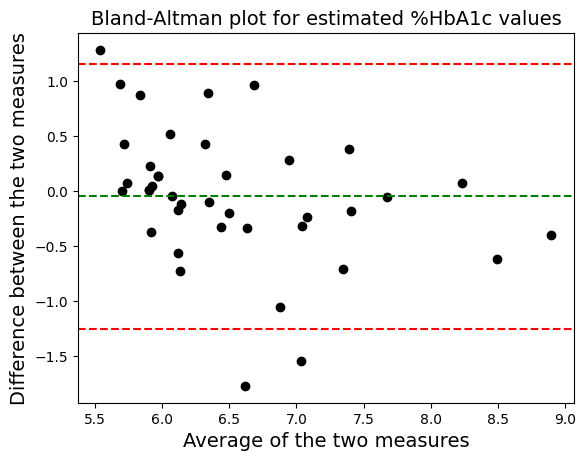

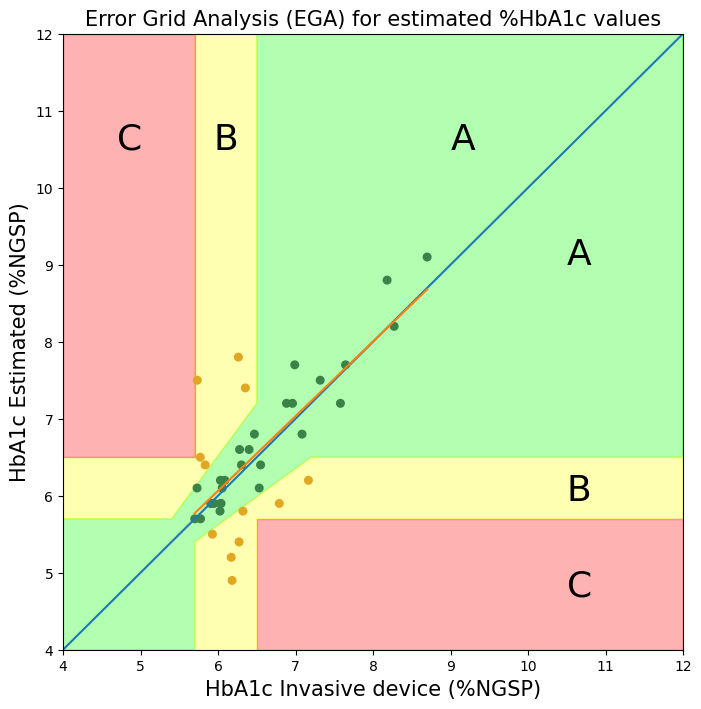

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t1_results_xg,
    exactValue     = t1_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.7440038868763963
MSE       =  0.5535433587121854
ME        =  -0.0012549999999745599
MAD       =  0.518147222222215
RMSE      =  0.7440049453546566
R2 score  =  0.37698677260004865
Pearson R and p-value:  PearsonRResult(statistic=0.6433718137505339, pvalue=7.543121248233477e-06)
##################################################################################



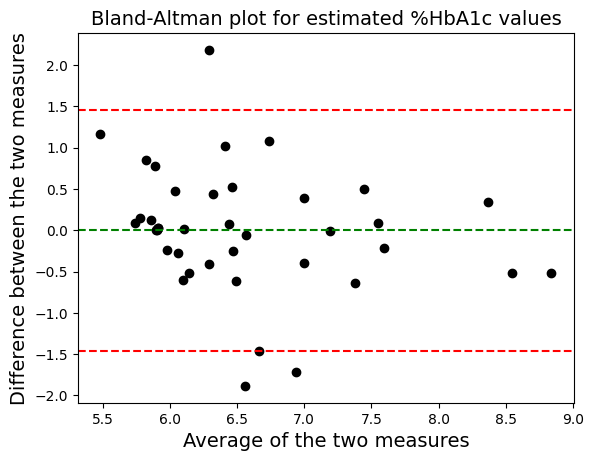

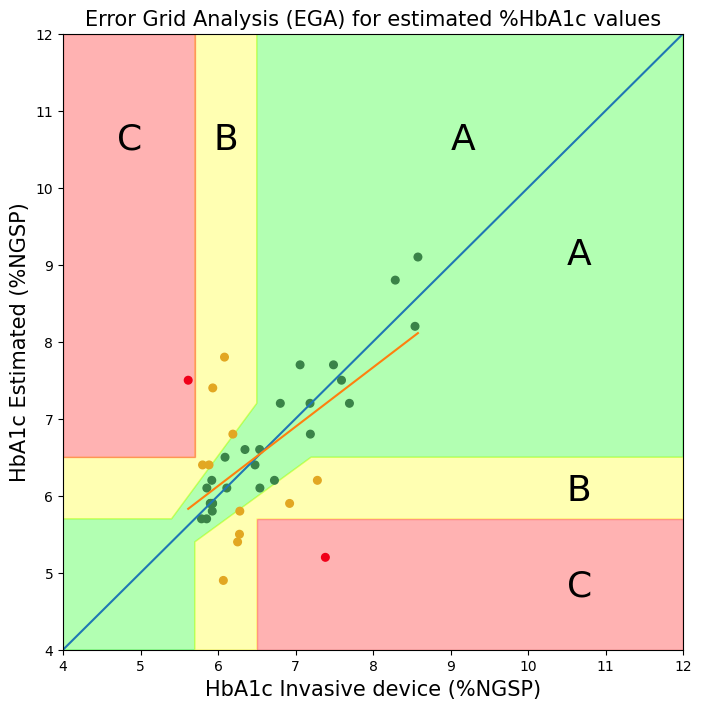

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t1_results_rf,
    exactValue     = t1_e_results_rf
)

# __Test-2:__
## _utilizing __considered_feature_set function__ for reflected signal_
> Note: (Executing the previous work of our lab)

In [ ]:
# initialization
t2_scores         = []
t2_results_xg     = []
t2_e_results_xg   = []
t2_results_rf     = []
t2_e_results_rf   = []
t2_test_cases     = []
t2_train_cases    = []
loo = sk.model_selection.LeaveOneOut()
countEpoch        = 0


for train_index, test_index in loo.split(falias):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1
    # print(train_index)
    # print(test_index)
    X_train, X_test      = np.asarray(fnam)[train_index], np.asarray(fnam)[test_index]
    y_train, y_test      = hba1c[train_index], hba1c[test_index]
    sp_train, sp_test    = spo2[train_index], spo2[test_index]
    bmi_train, bmi_test  = bmi[train_index], bmi[test_index]
    fw_train, fw_test    = fw[train_index], fw[test_index]

    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array          = considered_feature_set(X_train,True,y_train,sp_train,bmi_train,fw_train) # False = Transmission, True = Reflection

    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array           = considered_feature_set(X_test,True,y_test, sp_test, bmi_test, fw_test)
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
        
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))

    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test   = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    xg.fit(feature_train, hba1c_train)
    rf.fit(feature_train, hba1c_train)


    t2_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t2_e_results_xg.append(np.nanmean(hba1c_test))
    t2_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t2_e_results_rf.append(np.nanmean(hba1c_test))    
    t2_test_cases.append(X_test)
    t2_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 39
*************************************************************
*********************Training Array Set**********************
*************************************************************
./DataBase/data/3n/0402_._4.csv
jCount=0||lCount=0||featuresCount=15
[2.00000000e+01 1.60000000e+01 7.74746260e+02 7.67674668e+06
 3.26548224e+03 9.60000000e+01 1.20000000e+00 2.00000000e+01
 1.60000000e+01 1.28285456e+03 9.04935750e+07 2.68546899e+04
 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=1||lCount=1||featuresCount=15
[2.00000000e+01 1.60000000e+01 7.74210093e+02 7.41314150e+06
 3.23630876e+03 9.60000000e+01 1.20000000e+00 2.00000000e+01
 1.60000000e+01 1.22789407e+03 7.59704405e+07 2.56298125e+04
 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=2||lCount=2||featuresCount=15
[2.00000000e+01 1.60000000e+01 7.36714190e+02 5.75855270e+06
 2.29413129e+03 9.60000000e+01 1.20000000e+00 2.00000000e+01
 1.60000000e+01 8.65476698e+02 5.24230585e+06 1.27240119e+04
 9.60000000e+01 1

> Evaluation of __Test 2__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.36981354649313036
MSE       =  0.14474342811936364
ME        =  0.08933850765228268
MAD       =  0.2343863630294801
RMSE      =  0.380451610746181
R2 score  =  0.8370912253244734
Pearson R and p-value:  PearsonRResult(statistic=0.922767180088033, pvalue=2.541371111587012e-17)
##################################################################################



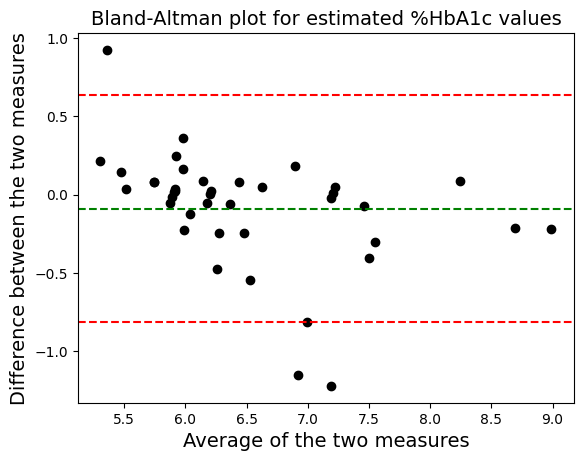

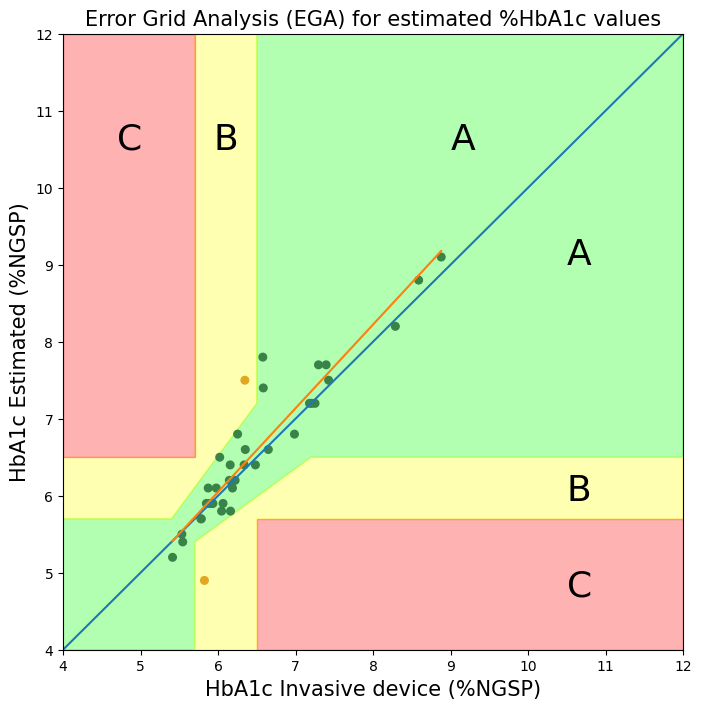

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t2_results_xg,
    exactValue     = t2_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.4723358014023583
MSE       =  0.2241635921319368
ME        =  -0.03259574888737486
MAD       =  0.3609314583468572
RMSE      =  0.47345917683781014
R2 score  =  0.7477038053087748
Pearson R and p-value:  PearsonRResult(statistic=0.8692791968607437, pvalue=3.458951686182631e-13)
##################################################################################



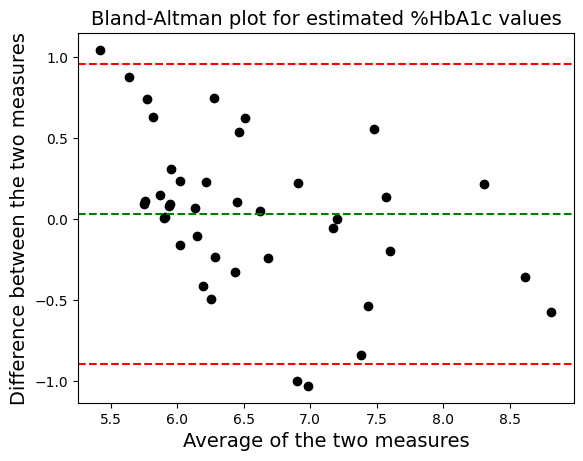

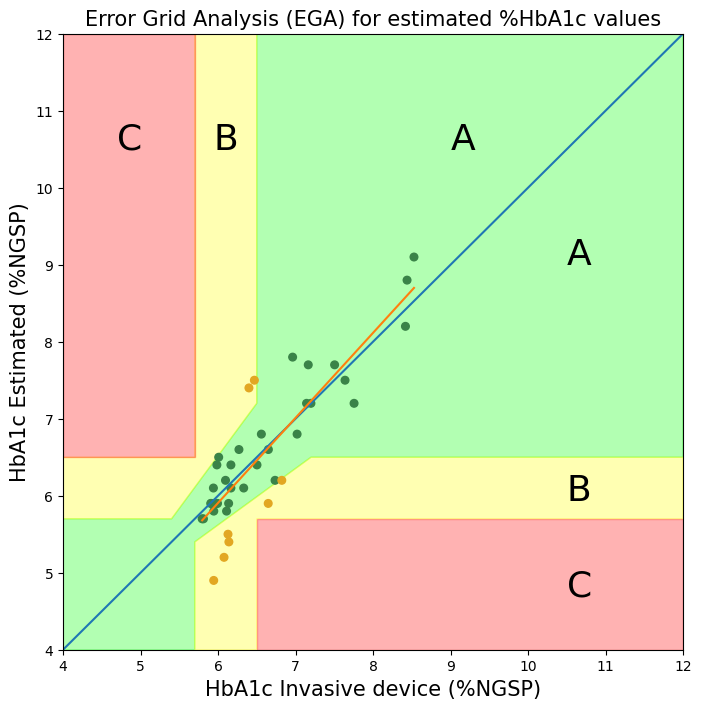

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t2_results_rf,
    exactValue     = t2_e_results_rf
)

# __Test-3:__
## _utilizing __updated_feature_set function__ for transmitted signal_
> Note: (Executing the my work)

In [ ]:
# initialization
t3_scores         = []
t3_results_xg     = []
t3_e_results_xg   = []
t3_results_rf     = []
t3_e_results_rf   = []
t3_test_cases     = []
t3_train_cases    = []
loo = sk.model_selection.LeaveOneOut()
countEpoch        = 0


for train_index, test_index in loo.split(falias):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1
    # print(train_index)
    # print(test_index)
    X_train, X_test      = np.asarray(fnam)[train_index], np.asarray(fnam)[test_index]
    y_train, y_test      = hba1c[train_index], hba1c[test_index]
    sp_train, sp_test    = spo2[train_index], spo2[test_index]
    bmi_train, bmi_test  = bmi[train_index], bmi[test_index]
    fw_train, fw_test    = fw[train_index], fw[test_index]

    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array          = updated_feature_set(X_train,False,y_train,sp_train,bmi_train,fw_train) # False = Transmission, True = Reflection

    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array           = updated_feature_set(X_test,False,y_test, sp_test, bmi_test, fw_test)
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
        
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))

    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test   = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    xg.fit(feature_train, hba1c_train)
    rf.fit(feature_train, hba1c_train)


    t3_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t3_e_results_xg.append(np.nanmean(hba1c_test))
    t3_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t3_e_results_rf.append(np.nanmean(hba1c_test))    
    t3_test_cases.append(X_test)
    t3_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 39
*************************************************************
*********************Training Array Set**********************
*************************************************************
jCount=0||lCount=0||featuresCount=12
[8.00000000e+00 5.96713983e+03 1.00288738e+11 2.71299311e+08
 1.60000000e+01 3.81364560e+02 4.95768983e+05 2.55947384e+02
 2.00000000e+01 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=1||lCount=1||featuresCount=12
[1.60000000e+01 5.51837261e+03 1.93674977e+10 1.07280200e+07
 1.60000000e+01 3.92142694e+02 4.96151415e+05 2.85237982e+02
 2.00000000e+01 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=2||lCount=2||featuresCount=12
[1.60000000e+01 5.67923766e+03 1.94263303e+10 1.16731111e+07
 1.60000000e+01 4.07940378e+02 4.90357184e+05 3.14195361e+02
 2.00000000e+01 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=3||lCount=3||featuresCount=12
[1.60000000e+01 5.52226392e+03 2.03352796e+10 1.01636297e+07
 1.60000000e+01 3.93872896e+02 5.16966311e

> Evaluation of __Test 3__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.515840358544894
MSE       =  0.2662522952193137
ME        =  0.012689354419708376
MAD       =  0.351089298725128
RMSE      =  0.5159964100837463
R2 score  =  0.7003329565128469
Pearson R and p-value:  PearsonRResult(statistic=0.8369686315584689, pvalue=1.7101633326169245e-11)
##################################################################################



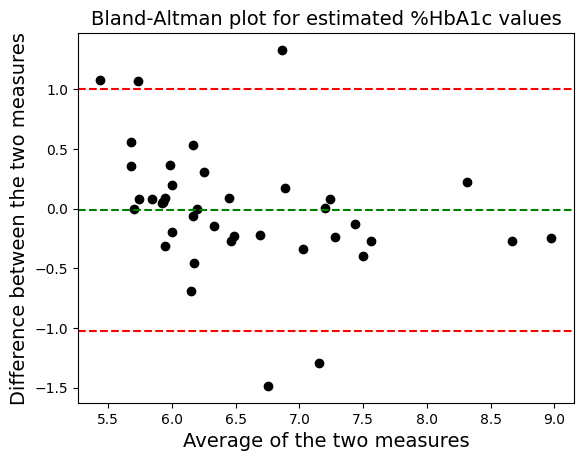

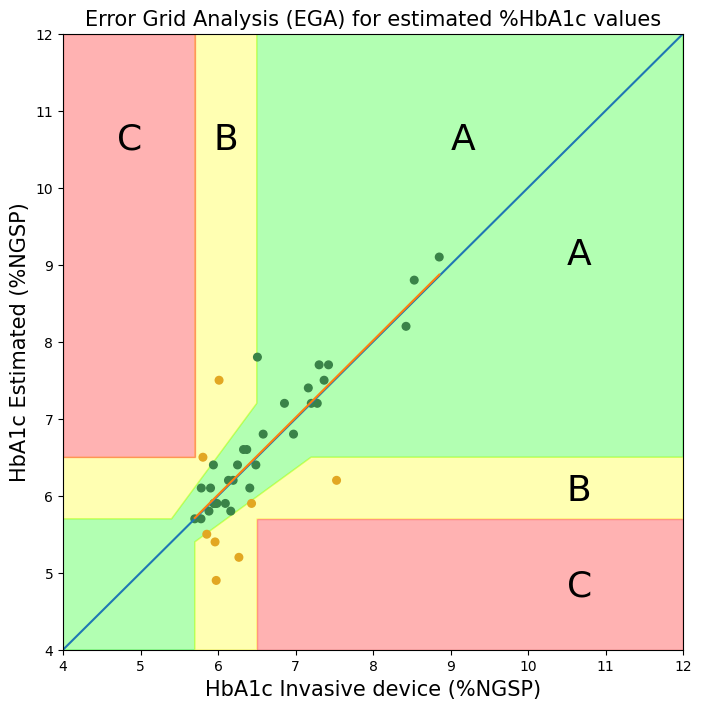

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t3_results_xg,
    exactValue     = t3_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.6492182205470247
MSE       =  0.422714095634244
ME        =  -0.03506847222219487
MAD       =  0.4351040277777625
RMSE      =  0.6501646680912798
R2 score  =  0.524235150068029
Pearson R and p-value:  PearsonRResult(statistic=0.7334942399705843, pvalue=7.292133088185647e-08)
##################################################################################



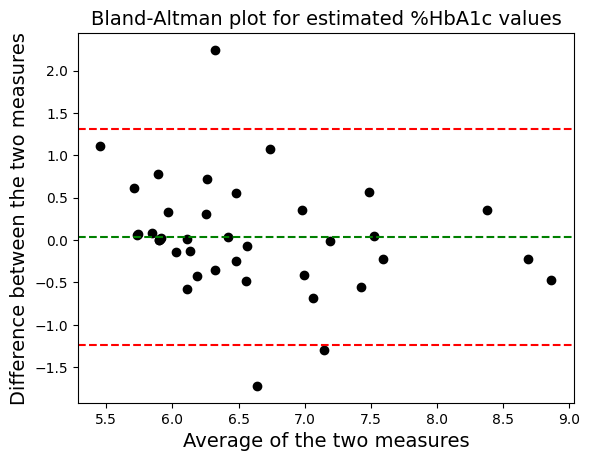

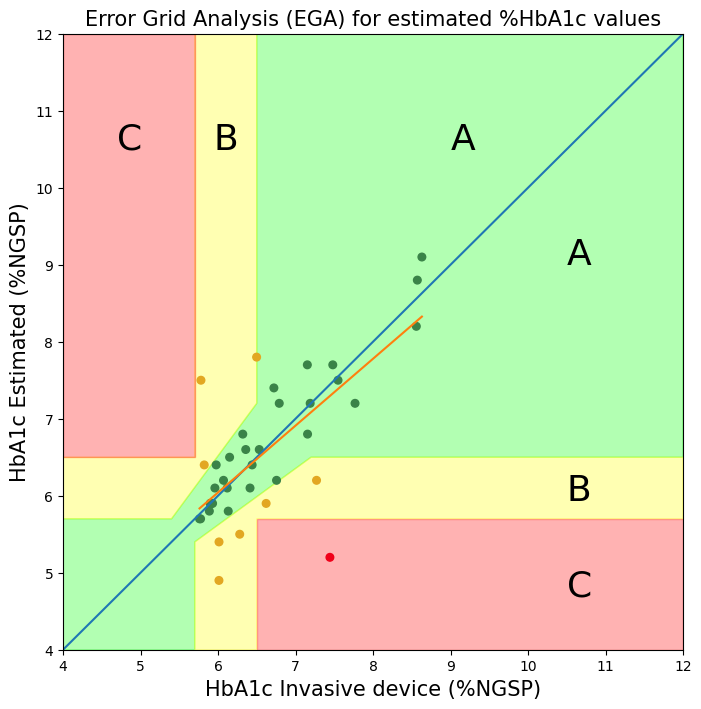

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t3_results_rf,
    exactValue     = t3_e_results_rf
)

# __Test-4:__
## _utilizing __updated_feature_set function__ for reflected signal_
> Note: (Executing the my work)

In [ ]:
# initialization
t4_scores         = []
t4_results_xg     = []
t4_e_results_xg   = []
t4_results_rf     = []
t4_e_results_rf   = []
t4_test_cases     = []
t4_train_cases    = []
loo = sk.model_selection.LeaveOneOut()
countEpoch        = 0


for train_index, test_index in loo.split(falias):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1
    # print(train_index)
    # print(test_index)
    X_train, X_test      = np.asarray(fnam)[train_index], np.asarray(fnam)[test_index]
    y_train, y_test      = hba1c[train_index], hba1c[test_index]
    sp_train, sp_test    = spo2[train_index], spo2[test_index]
    bmi_train, bmi_test  = bmi[train_index], bmi[test_index]
    fw_train, fw_test    = fw[train_index], fw[test_index]

    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array          = updated_feature_set(X_train,True,y_train,sp_train,bmi_train,fw_train) # False = Transmission, True = Reflection

    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array           = updated_feature_set(X_test,True,y_test, sp_test, bmi_test, fw_test)
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
        
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))

    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test   = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    xg.fit(feature_train, hba1c_train)
    rf.fit(feature_train, hba1c_train)


    t4_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t4_e_results_xg.append(np.nanmean(hba1c_test))
    t4_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t4_e_results_rf.append(np.nanmean(hba1c_test))    
    t4_test_cases.append(X_test)
    t4_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 39
*************************************************************
*********************Training Array Set**********************
*************************************************************
jCount=0||lCount=0||featuresCount=12
[1.60000000e+01 7.75341726e+02 7.67970454e+06 3.28596601e+03
 1.60000000e+01 1.28285456e+03 9.04935750e+07 2.68546899e+04
 2.00000000e+01 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=1||lCount=1||featuresCount=12
[1.60000000e+01 7.74846056e+02 7.39603830e+06 3.28954181e+03
 1.60000000e+01 1.22789407e+03 7.59704405e+07 2.56298125e+04
 2.00000000e+01 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=2||lCount=2||featuresCount=12
[1.60000000e+01 7.33172381e+02 5.63319816e+06 2.14780740e+03
 1.60000000e+01 8.60313673e+02 5.67907802e+06 1.26697253e+04
 2.00000000e+01 9.60000000e+01 1.20000000e+00 6.60000000e+00]
jCount=3||lCount=3||featuresCount=12
[1.60000000e+01 7.20684172e+02 5.98585243e+06 2.10002397e+03
 1.60000000e+01 6.00930821e+02 7.36014263e

> Evaluation of __Test 4__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.3932178411251707
MSE       =  0.16351093473991113
ME        =  0.09429031848907468
MAD       =  0.27454189300537113
RMSE      =  0.4043648534923765
R2 score  =  0.8159683906162412
Pearson R and p-value:  PearsonRResult(statistic=0.912404736097613, pvalue=2.535086019393474e-16)
##################################################################################



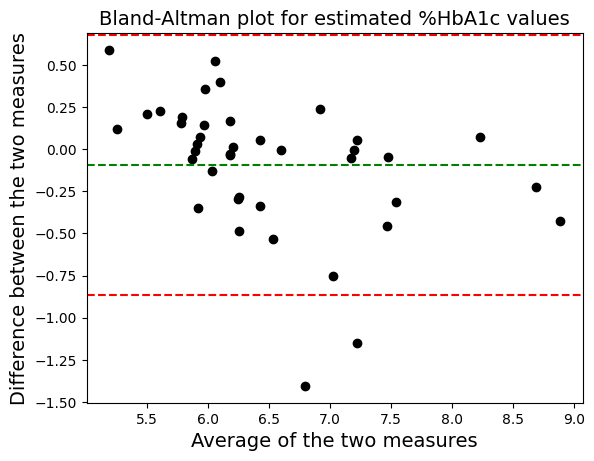

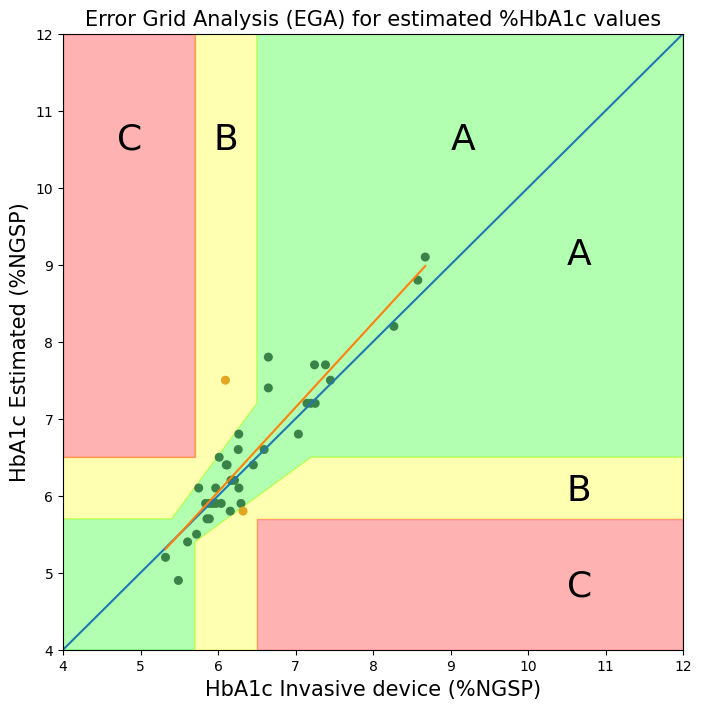

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t4_results_xg,
    exactValue     = t4_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.4971747588260296
MSE       =  0.2482187514995573
ME        =  -0.03218711987482899
MAD       =  0.3803914216766545
RMSE      =  0.4982155672994947
R2 score  =  0.7206297157413237
Pearson R and p-value:  PearsonRResult(statistic=0.8524668151725803, pvalue=2.955837029059663e-12)
##################################################################################



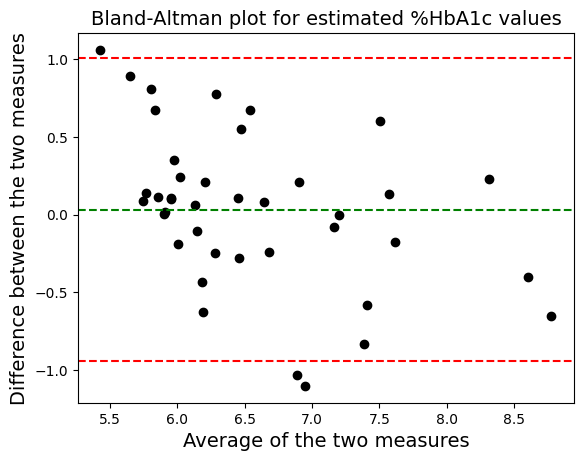

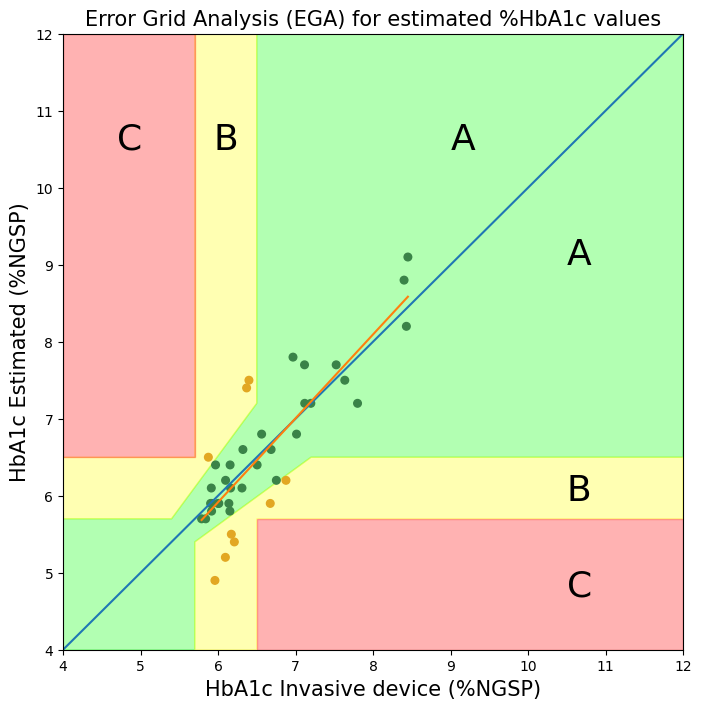

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t4_results_rf,
    exactValue     = t4_e_results_rf
)